In [8]:
from typing import Literal
import instructor
import vertexai
from vertexai.generative_models import GenerativeModel, Part, Image
from pydantic import BaseModel

In [9]:
vertexai.init(location="europe-west4")

client = instructor.from_vertexai(
    client=GenerativeModel("gemini-2.0-flash"),
    mode=instructor.Mode.VERTEXAI_TOOLS,
)

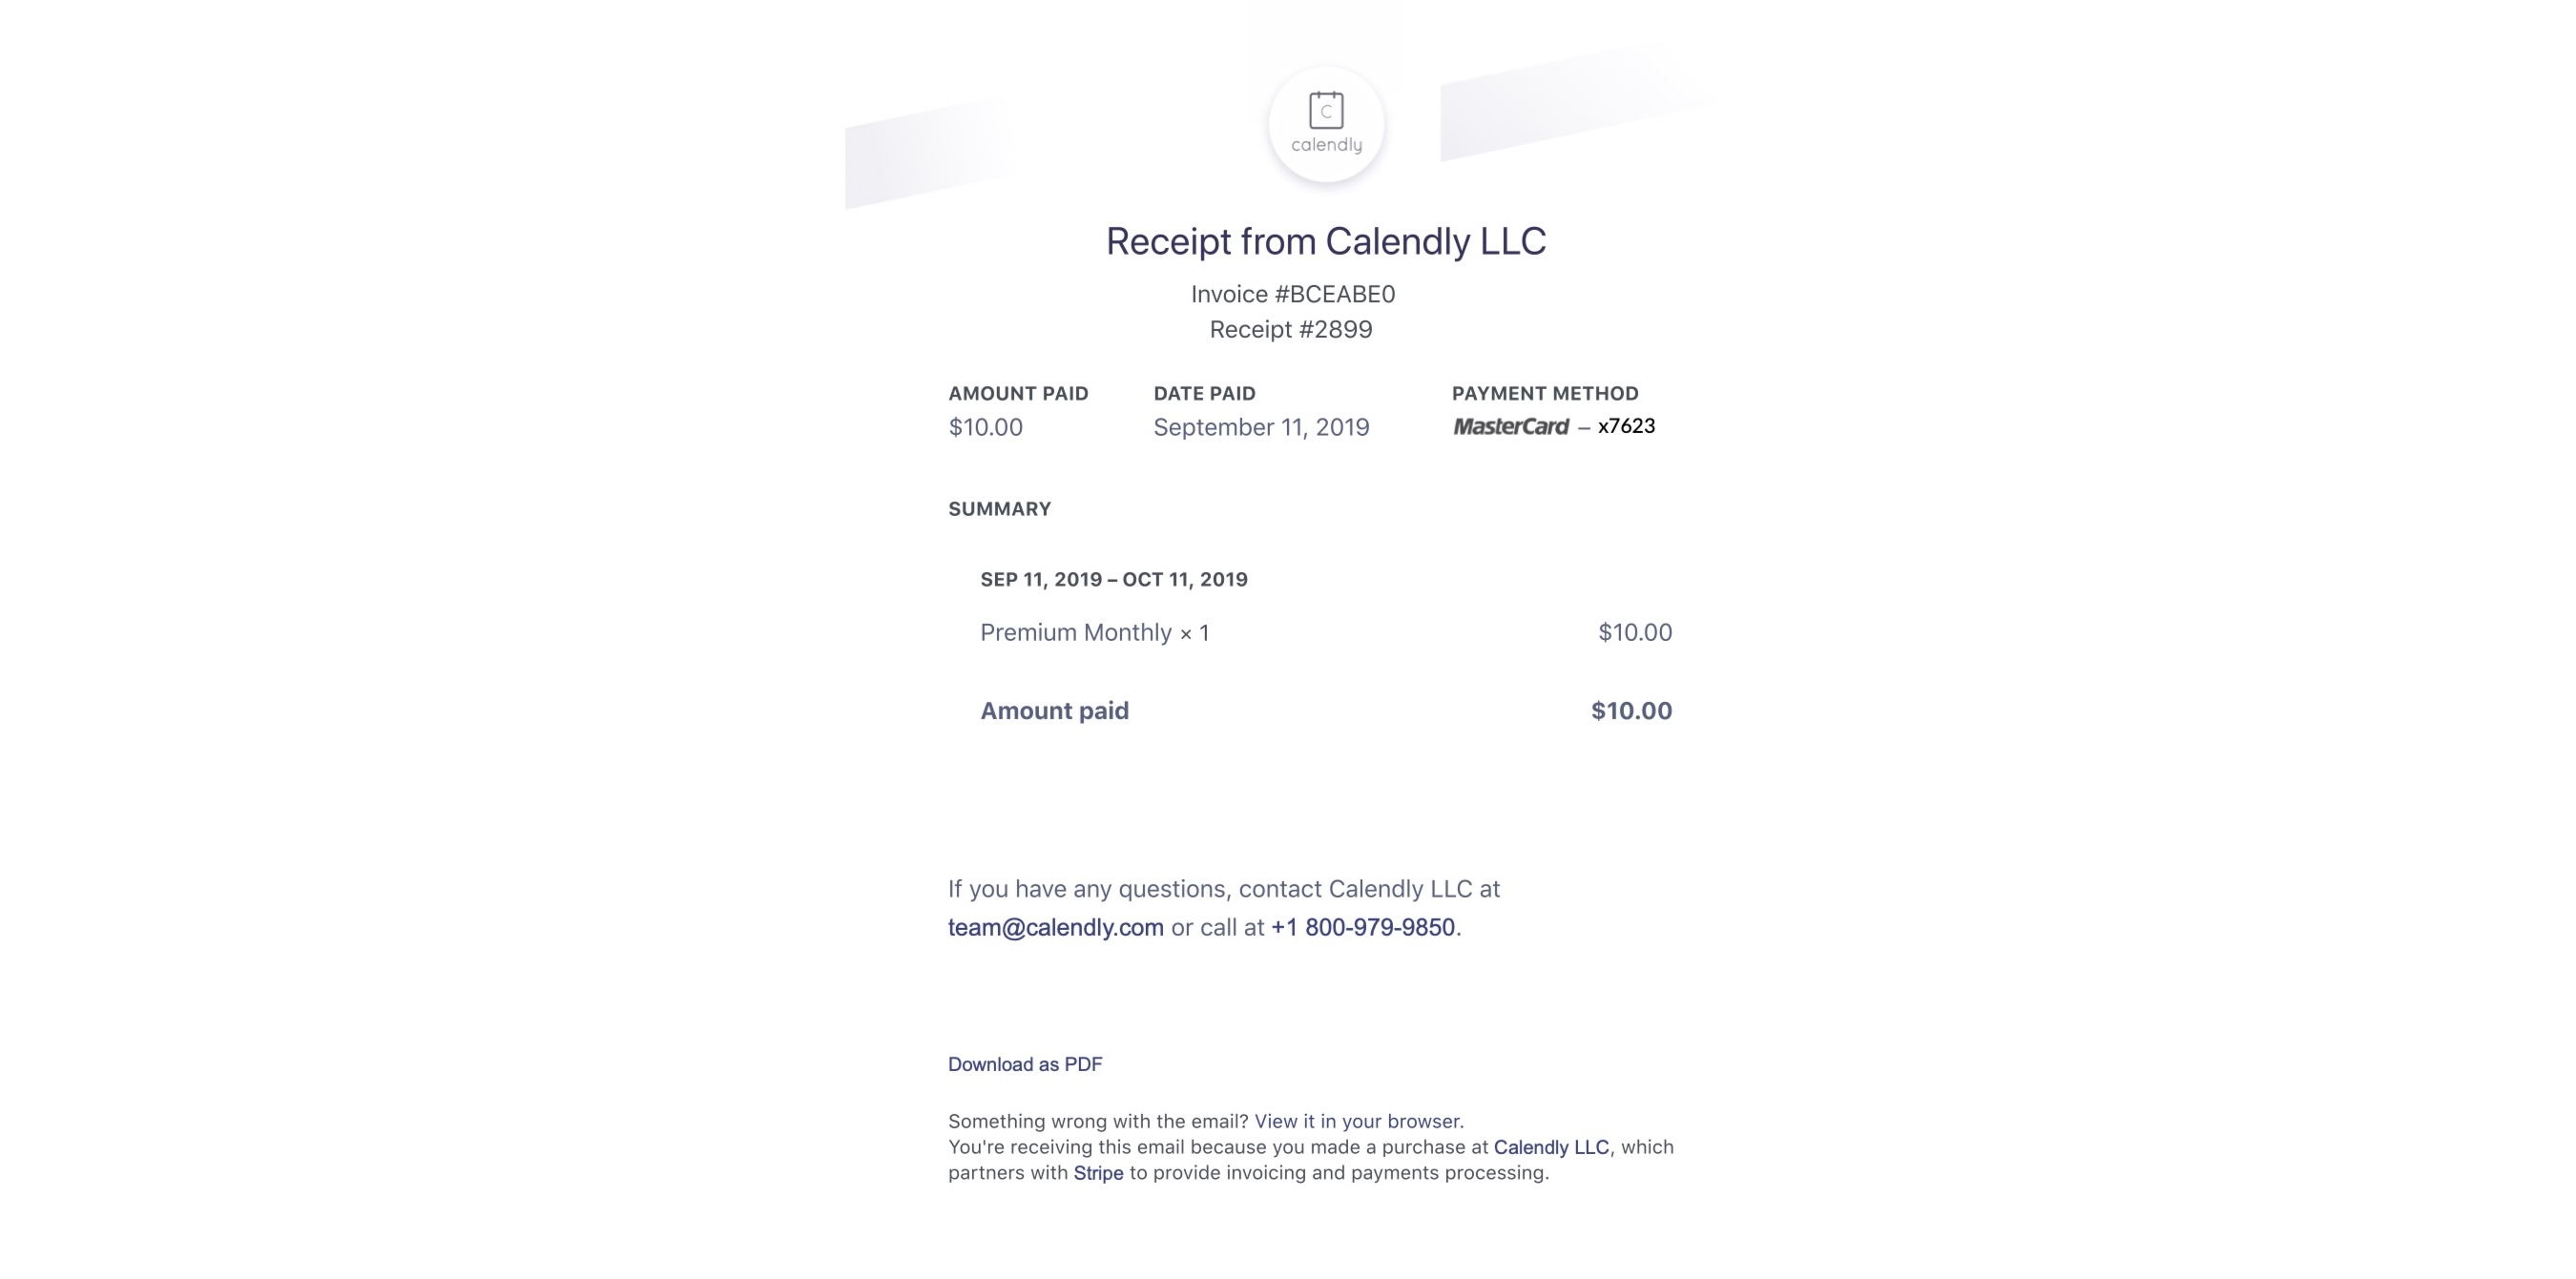

In [10]:
image = Image.load_from_file("../data/calendly_invoice.jpg")
image

In [11]:
class InvoiceData(BaseModel):
    invoice_number: str
    date_paid: str
    amount_paid: float
    currency: Literal["USD", "EUR", "GBP"]


client.create(
    messages=[
        "Find below an invoice file.",
        Part.from_image(
            image,
        )
    ],
    response_model=InvoiceData,
)

InvoiceData(invoice_number='BCEABEO', date_paid='September 11, 2019', amount_paid=10.0, currency='USD')